In [10]:
# Import the necessary libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#load and Inspect the data
data = pd.read_csv('SyriaTel.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Columns Description
`state:`The state where the customer resides.
`account length:` The number of days the account has been active.
`area code:` The area code of the customer’s phone number.
`phone number:` The customer’s phone number.
`international plan:` Whether the customer has an international plan (yes/no).
`voice mail plan:` Whether the customer has a voice mail plan (yes/no).
`number vmail messages:` The number of voice mail messages.
`total day minutes:` Total minutes of calls during the day.
`total day calls:` Total number of calls during the day.
`total day charge:` Total charge for calls during the day.
`total eve minutes:` Total minutes of calls during the evening.
`total eve calls:` Total number of calls during the evening.
`total eve charge:` Total charge for calls during the evening.
`total night minutes:` Total minutes of calls during the night.
`total night calls:` Total number of calls during the night.
`total night charge:` Total charge for calls during the night.
`total intl minutes:` Total minutes of international calls.
`total intl calls:` Total number of international calls.
`total intl charge:` Total charge for international calls.
`customer service calls:` Number of calls to customer service.
`churn:` Whether the customer has churned (True/False).

In [13]:
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Comments:
We have a dataset of 21 columns and 3,333 rows(entries). 
The columns description has been provided above for reference.
Our dataset is notably clean, it neither has duplicated values nor does it have missing values.
Out of the 21 columns, 16 are numeric(floats and integers) and our Target (Churn column) is of boolean type(Yes/No) hence indicating our task is a classification problem.    

In [16]:
# summary Statistics
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##### Comments:



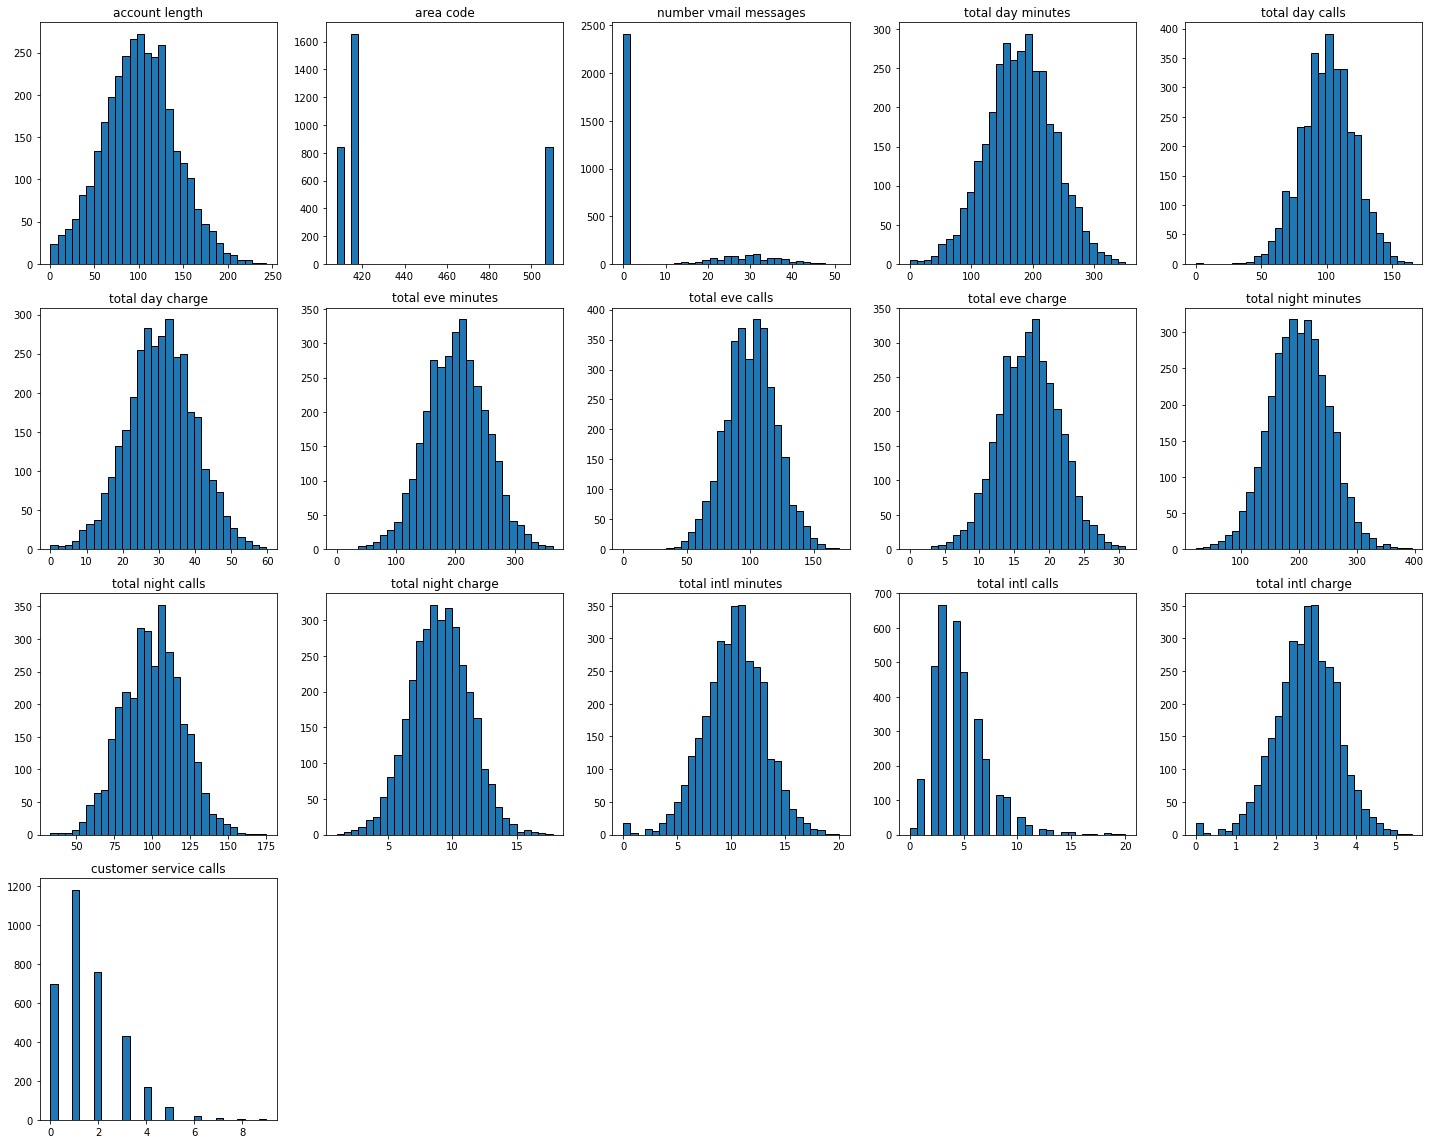

In [38]:
# Visualize relationships
# Univariate Analysis For all features except the phone no.
# Univariate Analysis for Numerical Features
numerical_features = data.select_dtypes(include = ['int64', 'float64'])

# Number of numerical features
num_features = numerical_features.shape[1]

# Determine the number of rows and columns for the subplots grid
num_cols = 5  

# Calculate number of rows needed
num_rows = (num_features + num_cols - 1) // num_cols  

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, column in enumerate(numerical_features.columns):
    axes[i].hist(numerical_features[column], bins=30, edgecolor='k')
    axes[i].set_title(column)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Comments:


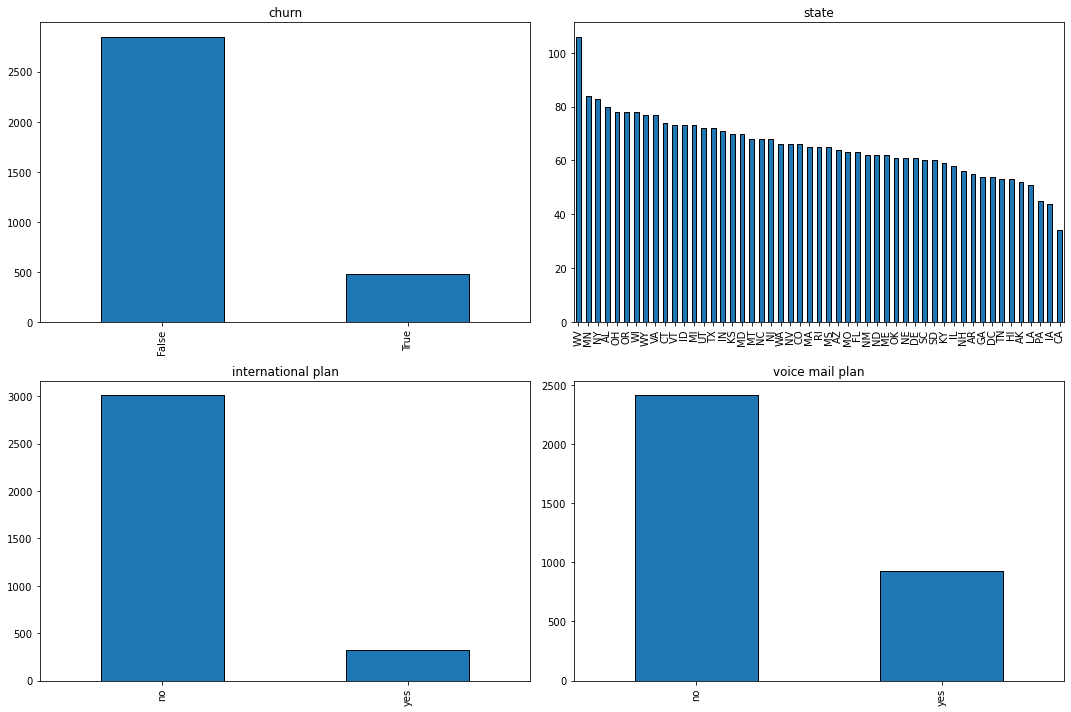

In [43]:
# Univariate Analysis for Categorical Columns( Target column included)
categorical_features = data[['churn', 'state', 'international plan', 'voice mail plan']]
# Number of columns for the grid
num_cols = 2 
# Number of rows for the grid
num_rows = 2  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting each categorical feature
for i, column in enumerate(categorical_features.columns):
    categorical_features[column].value_counts().plot(kind='bar', ax=axes[i], edgecolor='k')
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

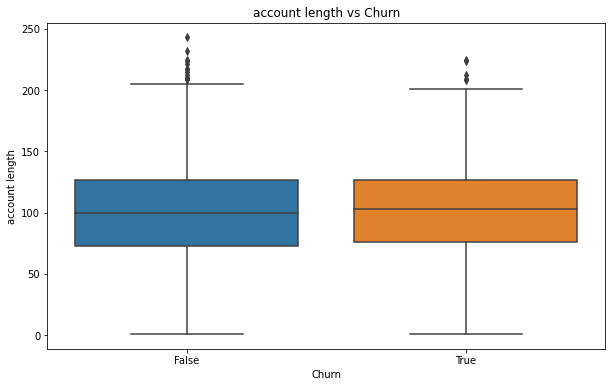

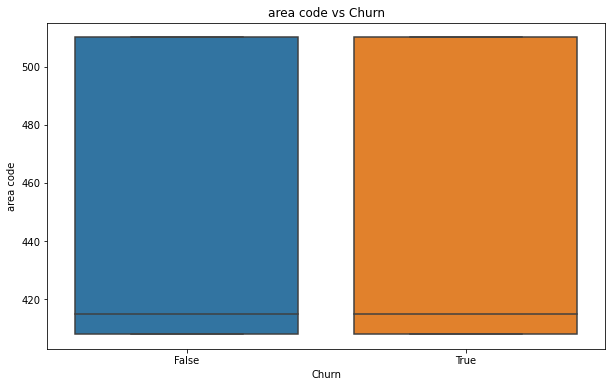

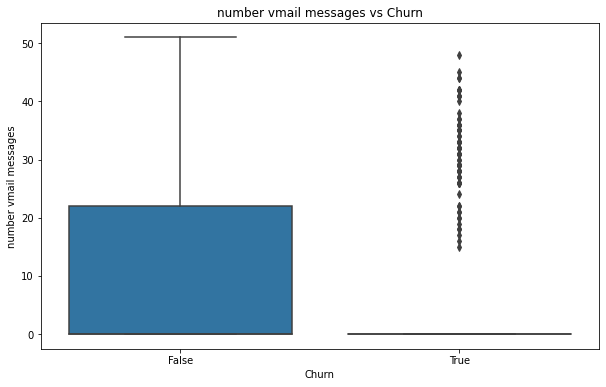

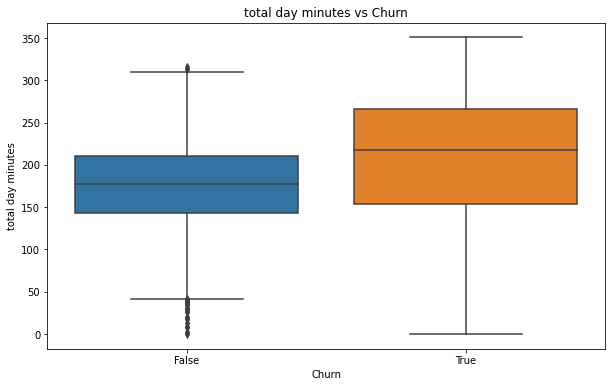

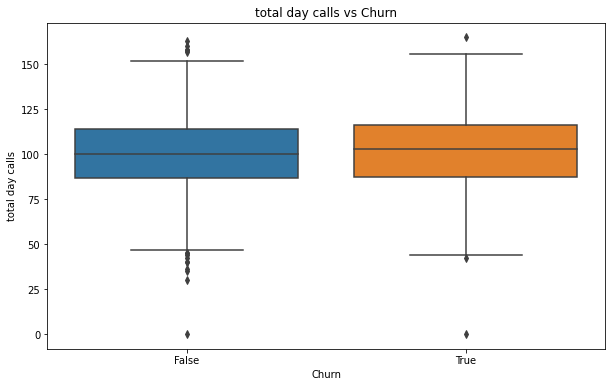

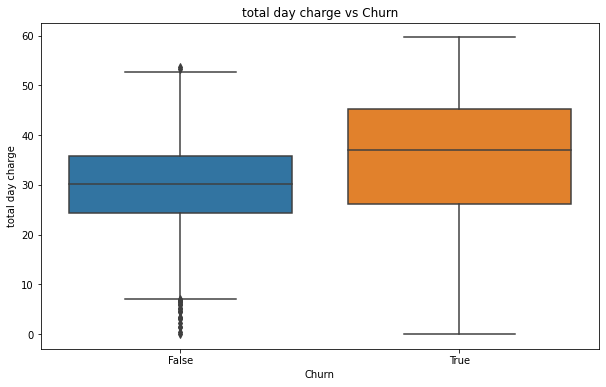

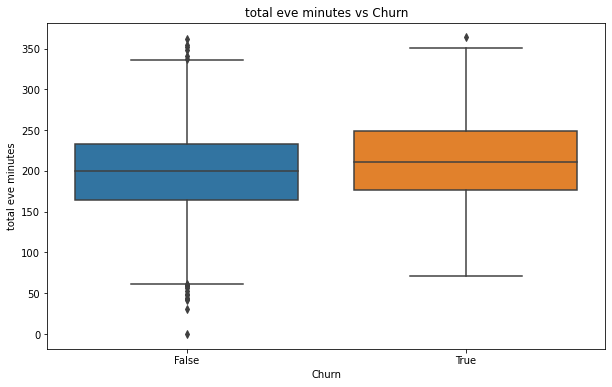

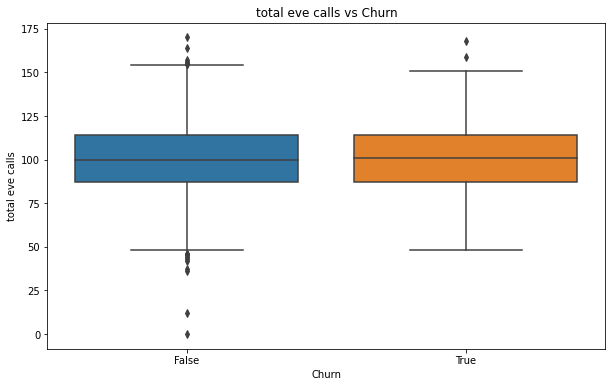

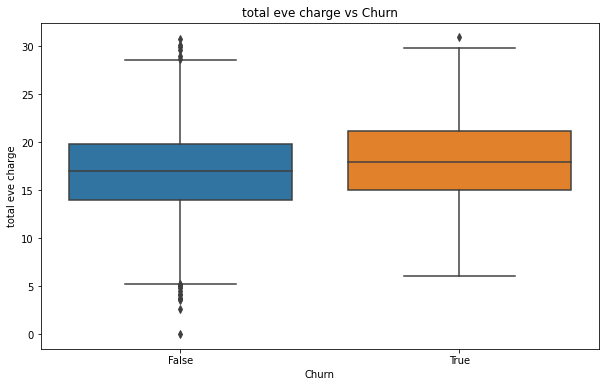

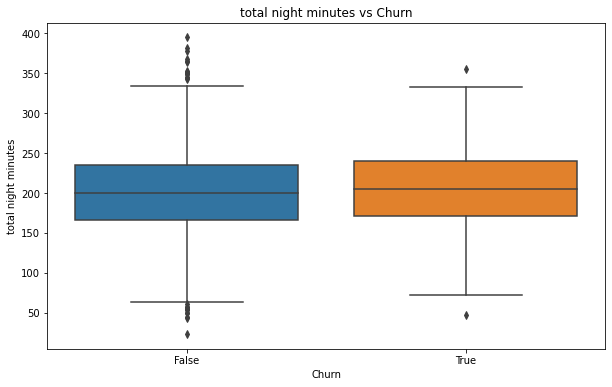

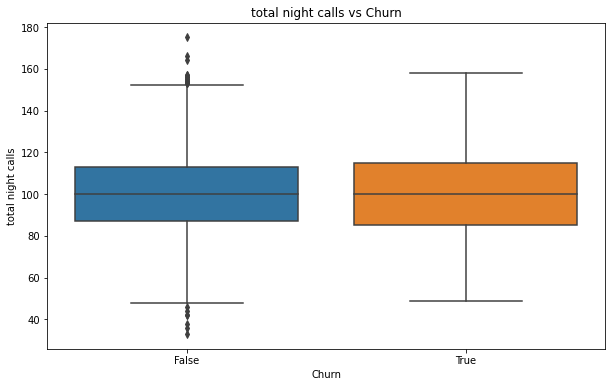

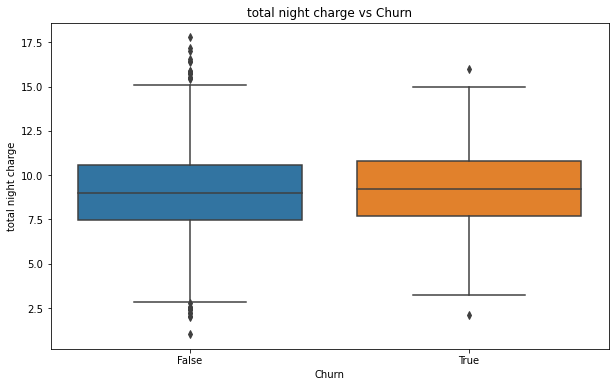

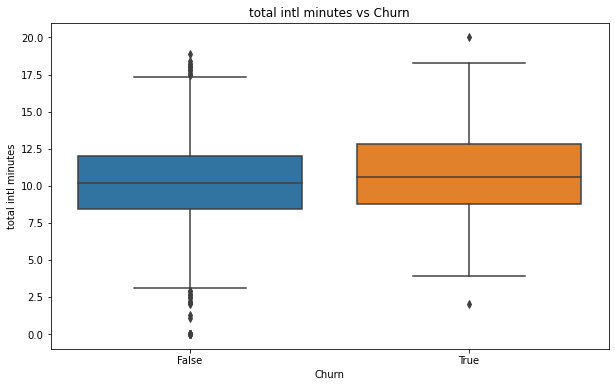

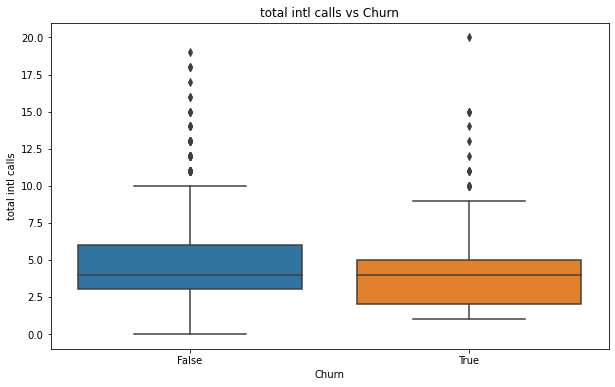

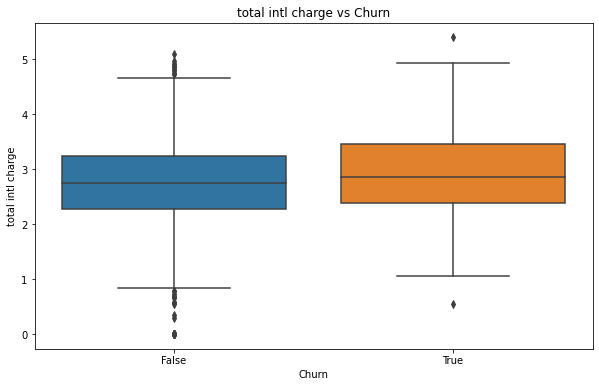

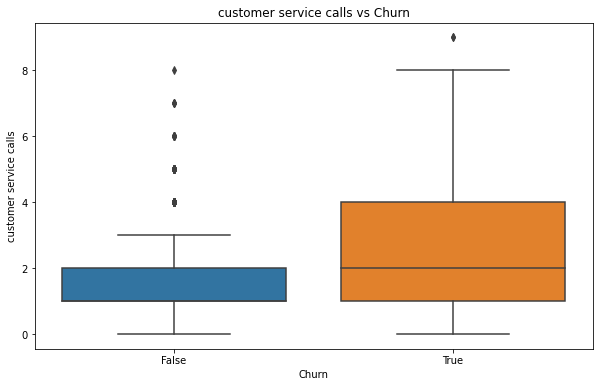

In [44]:
# Generate box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

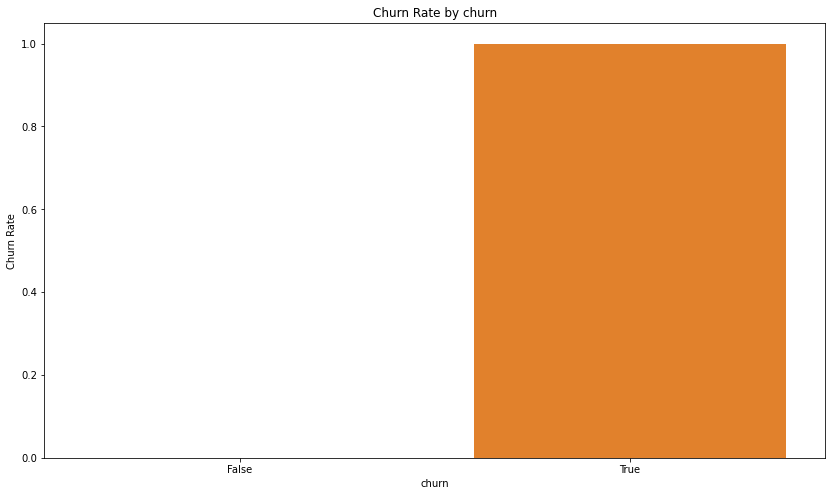

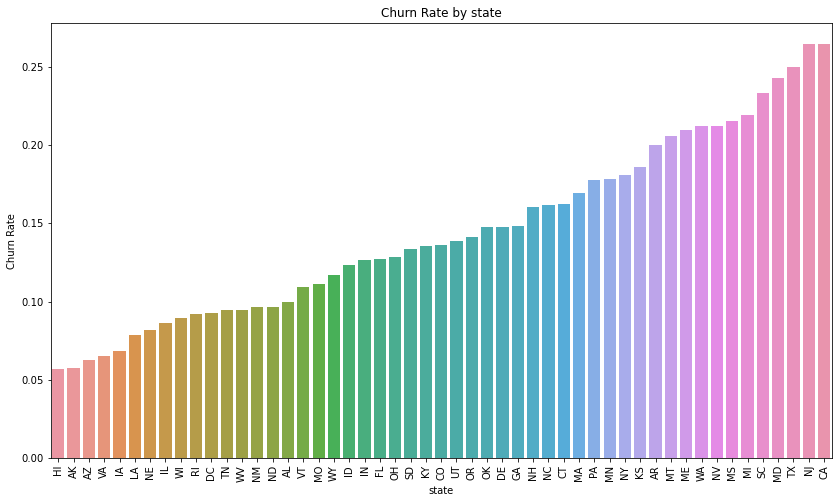

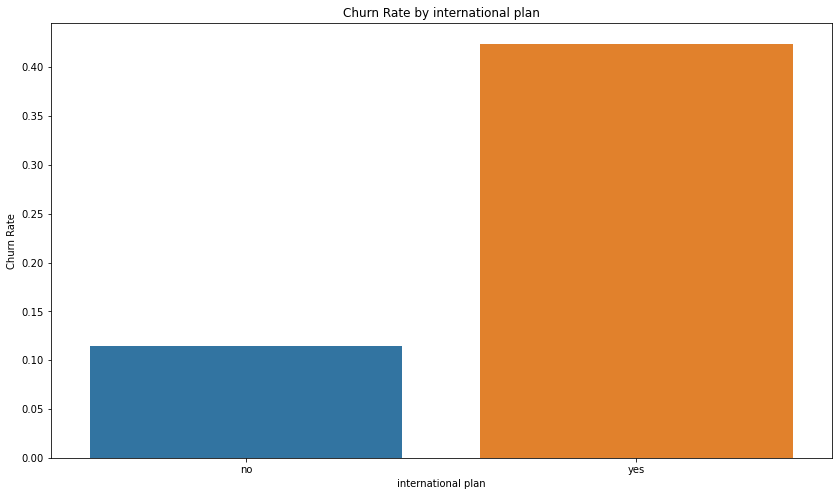

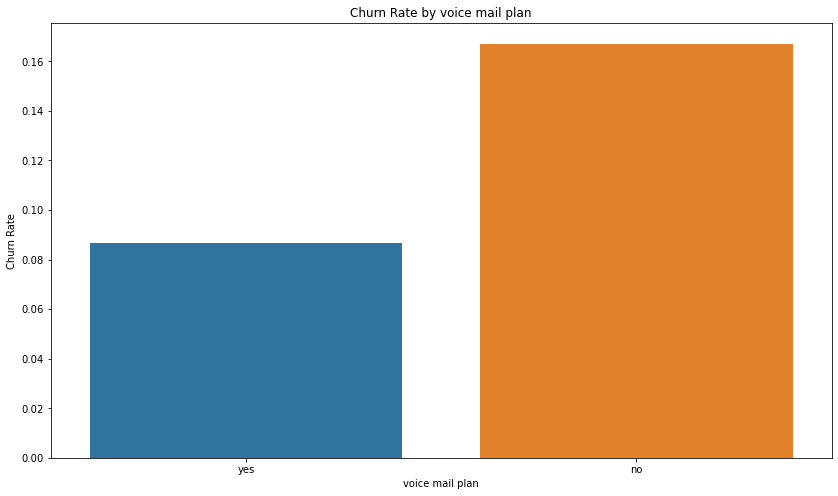

In [45]:
# Generate bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    churn_rate = data.groupby(feature)['churn'].mean().sort_values()
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=90 if feature == 'state' else 0)
    plt.show()